# COMP-4740 Project 1: Convolutional Neural Network on MNIST Dataset
Submitted by: Saffa Alvi, Nour ElKott <br>
March 1, 2022 <br>

This file contains the source code for our CNN architecture and 
shows the application of our model to the MNIST dataset.

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Public API for tf.keras.datasets.mnist namespace - import TensorFlow and MNIST dataset under the Keras API
mnist = tf.keras.datasets.mnist # 0-9, 28x28 images, 1 colour channel

Separated as train and test, separates the labels/classes and the images.<br>
X_train and X_test parts contain greyscale RGB codes (from 0 to 255).<br>
Y_train and Y_test parts contain labels from 0 to 9 for the image number.

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 

In [4]:
print("Train dataset size: ", X_train.shape)
print("Test dataset size: ", X_test.shape)

Train dataset size:  (60000, 28, 28)
Test dataset size:  (10000, 28, 28)


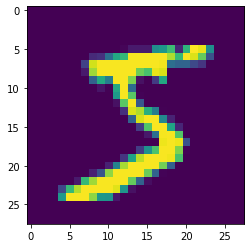

In [5]:
# visualize dataset
import matplotlib.pyplot as plt
plt.imshow(X_train[0])     # display index 0 of training group as an image
plt.show()                

**Normalize and Reshape the Datasets** <br>

In [6]:
X_train = tf.keras.utils.normalize(X_train, axis=1) 
X_test = tf.keras.utils.normalize(X_test, axis=1)   

# need to reshape the data as keras needs 4D datasets, and ours are 3D right now
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# new reshaped dataset
print(X_test.shape)
print(X_train.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


**Building the Model** <br>

In [7]:
# build the model
model = tf.keras.models.Sequential() # most common model

# add l2 regularization - not used 
# l2 = tf.keras.regularizers.l2(0.00015)

# add the layers

# hidden layers
model.add(tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
# add dropout regularization
tf.keras.layers.Dropout(0.30)

model.add(tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
# add dropout regularization
tf.keras.layers.Dropout(0.40)

# flattens out the input layer
model.add(tf.keras.layers.Flatten()) 

# output layer
# last dense layer must have 10 neurons as we have 10 classes
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
# add dropout regularization
tf.keras.layers.Dropout(0.30)

2022-02-26 21:36:46.821117: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Compile and Fit the Model** <br>

In [8]:
# add learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=3) # epoch is the number of passes through the entire training dataset

Epoch 1/3
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1146 - accuracy: 0.9646
Epoch 2/3
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0444 - accuracy: 0.9860
Epoch 3/3
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0310 - accuracy: 0.9901


**Calculate Loss and Accuracy using Test Dataset** <br>

In [9]:
# calculate validation loss and accuracy using the test dataset
valLoss, valAcc = model.evaluate(X_test, Y_test)
print(valLoss, valAcc)

313/313 [==============================] - 4s 11ms/step - loss: 0.0327 - accuracy: 0.9905
0.03274731710553169 0.9904999732971191


# Summary of Model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 10)                6

In [11]:
predictions = model.predict([X_test])
print(predictions) # prints the probability distributions

Consider rewriting this model with the Functional API.
[[1.7419692e-10 7.5373688e-14 4.6352636e-08 ... 1.0000000e+00
  4.5959113e-12 5.3855648e-10]
 [2.7883198e-06 1.5533486e-07 9.9999440e-01 ... 6.3918293e-08
  4.8302127e-07 1.2860167e-10]
 [1.9553241e-09 9.9997103e-01 5.9214109e-09 ... 1.8494620e-05
  1.7250861e-06 1.8249558e-07]
 ...
 [1.9180741e-14 3.0649341e-10 1.4562883e-14 ... 2.4345326e-08
  1.3495490e-07 5.2862902e-08]
 [1.0851271e-10 5.2889373e-16 2.6607657e-11 ... 1.0692882e-14
  5.9764449e-07 3.7437529e-11]
 [2.3907159e-08 1.3756509e-12 1.8115630e-08 ... 4.6485368e-14
  1.5944741e-09 1.0364394e-11]]


## Show the handwritten digit and the model prediction

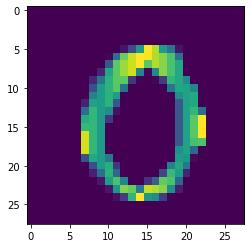

Model Prediction:  0


In [ ]:
import random

w, x, y, z = X_test.shape

while(1):
    
    # choose random sample from test dataset
    num1 = random.randint(0, x)
    
    # show sample chosen
    plt.imshow(X_test[num1])
    plt.show()
    
    # show model prediction
    print("Model Prediction: ", np.argmax(predictions[num1]))
    
    # Pause when 'q' is entered
    cont = input('Paused - press ENTER to continue, q to exit: ')
    if cont == 'q':
        break